In [1]:
import projX
import pyemma
import numpy as np
from matplotlib import pylab as plt
import nglview
%matplotlib notebook

In [10]:
trajfile = '/group/ag_cmb/scratch/gph82/work/CMB/hierarchical_TICA/bpti-shaw/DESRES-Trajectory-bpti-c-alpha/c-alpha_centered.stride.100.xtc'
top  = '/group/ag_cmb/scratch/gph82/work/CMB/hierarchical_TICA/bpti-shaw/DESRES-Trajectory-bpti-c-alpha/bpti-c-alpha_centered.pdb'

Skip this part if you already have an Y.npy file

In [8]:
feat = pyemma.coordinates.featurizer(top)
pairs = feat.pairs(range(feat.topology.n_atoms)[::2])
feat.add_distances(pairs)
#src  = pyemma.coordinates.source(traj, features=feat)
#tica = pyemma.coordinates.tica(src, lag=10, dim=2)
#Y = tica.get_output()[0]
#np.save('Y.npy', Y)

# Look at the -log(PDF) plot and wonder what the coordinates mean...

<IPython.core.display.Javascript object>


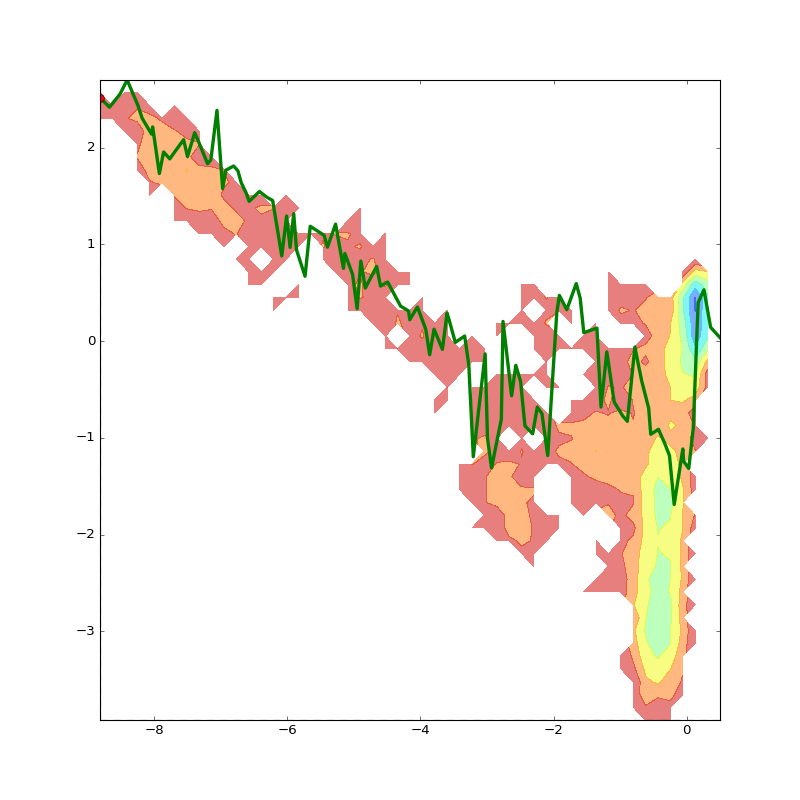

/home/mi/gph82/miniconda3/lib/python3.4/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log


In [3]:
Y = np.load('Y.npy')
plt.figure(figsize=(10,10))
h, (x,y) = np.histogramdd(Y, bins=50)
plt.contourf(x[:-1], y[:-1], -np.log(h.T), alpha=.50)

# Use projX to generate paths along the projections

In [ ]:
paths_dict, idata = projX.generate_paths(trajfile, top, 
                                         'Y.npy', 
                                         n_projs=2,
                                         verbose=False, 
                                        )

# Link the above plot with the sampled structures and visually explore the coordinate. 
Click either on the plot or on the widget slidebar: they're connected! You can change the type of path between min_rmsd or min_disp and you can also change the coordinate sampled (0 or 1)


In [6]:
coord = 0
path_type = 'min_rmsd'
#path_type = 'min_disp'
igeom = paths_dict[coord][path_type]["geom"]
ipath = paths_dict[coord][path_type]["proj"]
iwdg = projX.visualize_paths(ipath,
                      igeom.superpose(igeom[0]), 
                      plt.gca(), plot_path=True)
iwdg

In [9]:
pyemma.coordinates.source(igeom.xyz, features=feat)